# ПРОЕКТ

**Выявление факторов, влияющих на успешность компьютерных игр на основе данных интернет-магазина «Стримчик»**

*Цель проекта:*

Выявление закономерностей, определяющих успешность компьютерной игры, на основе исторических данных интернет-магазина «Стримчик». Результаты анализа должны помочь магазину делать обоснованные ставки на потенциально успешные продукты и эффективно планировать рекламные кампании.

*План исследования:*
- Изучение общей информаци
- Подготовка данных
- Исследовательский анализ данных
- Составление портрета пользователя
- Проверка гипотез
- Выведение общего вывода, подведение итогов исследования и выработка рекомендаций для интернет-магазина «Стримчик» на основе полученных результатов

## Изучение общей информации

In [1]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
#загрузка датасета
data = pd.read_csv(r"C:\Users\aliak\Downloads\games.csv")
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
#просмотр общей инфо о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод после первичного анализа данных

Первичный анализ содержащейся информации показал, что:

1) В датафрейме 16715 строк и 11 колонок.

Колонки:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

2) Есть пропущенные значения в ряде колонок, и их довольно много в колонках Year_of_Release, Critic_Score, User_Score, Rating.

3) Нужно будет привести к нижнему регистру названия колонок.

4) Колонка User_Score оформлена как строка, её надо будет переделать в числовой формат.

**Переходим к предобработке данных**

##  Предобработка данных

In [4]:
#Технический комментарий
#Будем работать с копией для устранения возможных ошибок
df = data.copy()

In [5]:
#изменим регистр в названиях нескольких столбцов и сразу проверим, что все исправилось
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Мозолят глаза нули в колонке год выпуска. Уберем эти нули, помня о том, что там еще есть NaN, и просто перевод в int не сработает.

In [6]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

Теперь разберемся с колонкой user_score

Опытным путем было проверено, что приведение к типу float не сработает:

#df['user_score'] = df['user_score'].astype(float)

Выдаст ошибку could not convert string to float: 'tbd'

Это связанно с тем, что tbd (To Be Determined) - это строка, и её смысл - сообщить нам, что рейтинг еще по каким-то причинам не определен. Фактически, это значение можно приравнять к NaN. Так и сделаем.

In [7]:
df['user_score'].replace('tbd', np.nan, inplace=True)
df['user_score'] = df['user_score'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Пропусков стало гораздо больше теперь в этом столбце. Позже решим, что с ними делать.

Перейдем к работой с дубликатами.

In [8]:
#проверка на дубликаты
df.duplicated().sum()

0

Явных дубликатов нет. Проверим на неявные дубликаты. Да и в целом неплохо привести к нижнему регистру содержимое колонок с названиями и платформами для удобства.

In [9]:
# Приводим всё к нижнему регистру
df["genre"] = df["genre"].str.lower()
df["platform"] = df["platform"].str.lower()
df["name"] = df["name"].str.lower()

df.duplicated().sum()

0

In [10]:
df.duplicated(subset=['name', 'platform', 'year_of_release'], keep='first').sum()

2

Нашлось 2 неявных дубликата. Удалим их.

In [11]:
df.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           9948 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


2 неявных дубликата были также удалены.
Переходим к работе с пропусками.

In [12]:
#Посмотрим на точное число пропусков
df.isnull().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating             6765
dtype: int64

In [13]:
#посмотрим на пропуски в столбце user_score
df[df['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
#посмотрим на пропуски в столбце year_of_release
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,<NA>,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,<NA>,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,wii,<NA>,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,ps2,<NA>,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,<NA>,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,psp,<NA>,sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,freaky flyers,gc,<NA>,racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,inversion,pc,<NA>,shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,hakuouki: shinsengumi kitan,ps3,<NA>,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [15]:
df[df['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Так как пропущенных данных много, поэтому поставим заглушку UNKNOWN весто пропусков в rating.

In [16]:
df['rating'].fillna("UNKNOWN", inplace=True)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,UNKNOWN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,UNKNOWN
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,UNKNOWN
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,UNKNOWN
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,UNKNOWN


### Вывод по пропускам

- 2 строки, где пропущено название игры, не повлияют на анализ, да и название менее важно, чем платформа. Оставляем их.

- есть закономерность: пропуски в critic_score, user_score, rating идут вместе. Можно было бы предположить, что только у игр 80-х и 90-х пропущены значения, но это оказалось не так, так как в 2016 тоже такое есть. А так же пропуски в отзывах могли появиться, потому что продажи игры были низкие и не набралось необходимого количества индивидуальных отзывов для получения итоговой оценки.

- 269 пропусков в годах на первый взгляд не связаны каким-то закономерностями.

- Какие причины могли привести к пропускам в rating? Рейтинг могли поставить только для партий, предназначенных в основном для США и Канады, ведь этот рейтинг выставляется только для этих стран. Так как пропусков много, заполнили эти пропуски заглушками UNKNOWN.

Таким образом, оставляем пока что все пропуски в critic_score, user_score, как есть, так как неясно, чем их заполнить. Если заполнять по платформе или жанру, это будет слишком большое обобщение.

Наконец, посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [17]:
df["total_sales"] = df["na_sales"] + df["eu_sales"] + df["jp_sales"] + df["other_sales"]
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,UNKNOWN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,UNKNOWN,31.38


### Промежуточный вывод после предобработки данных

- в целом данные правдоподобны

- дубликаты были удалены

- пропуски в столбцах critic_score, user_score заполнить чем-то не представляется возможным, поэтому они были оставлены

- пропуски в столбце rating были заполнены заглушками

- добавлен столбцец с общей выручкой

## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы.

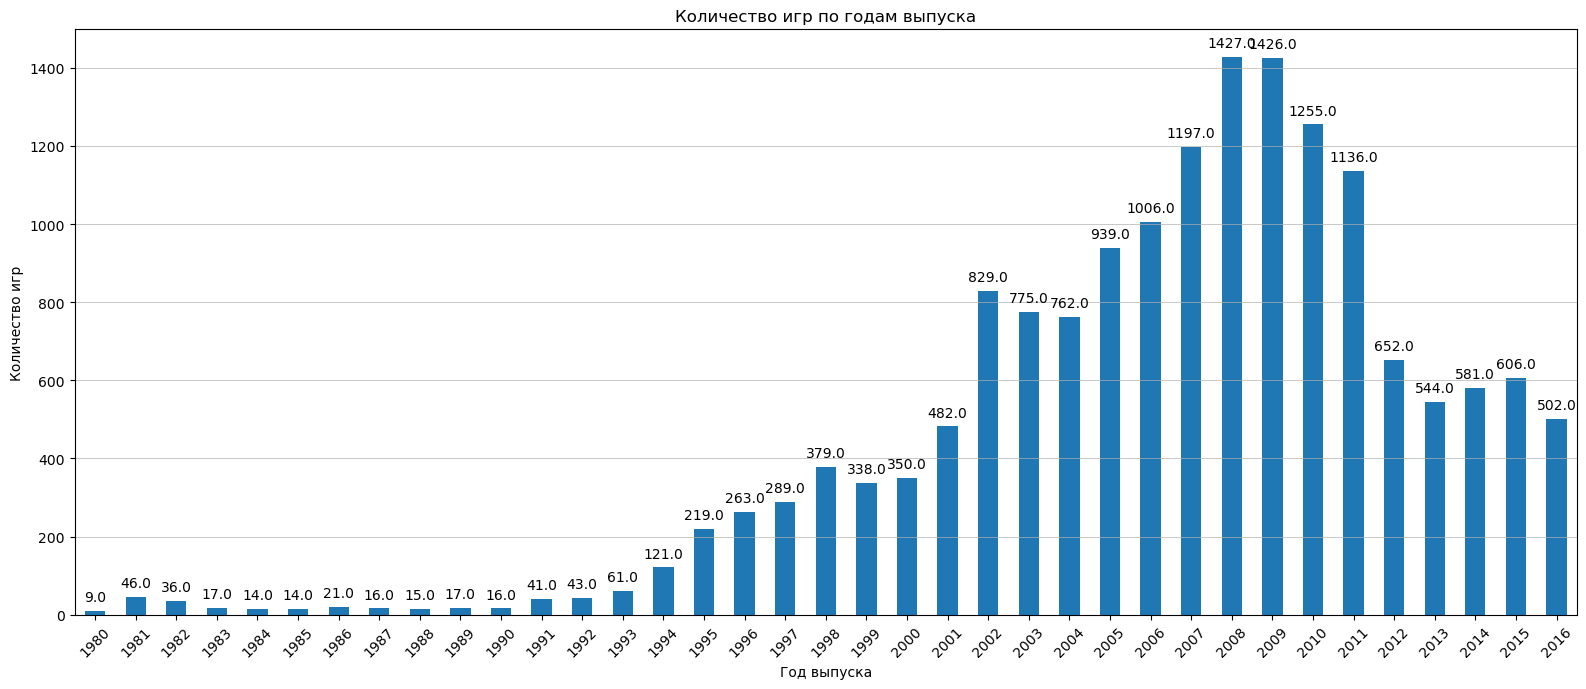

In [18]:
#строим стобчатую диаграмму по частотам
plt.figure(figsize=(16, 7))
ax = df['year_of_release'].value_counts().sort_index().plot.bar()

#добавим количество над каждым столбцом
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.title("Количество игр по годам выпуска")
plt.xlabel("Год выпуска")
plt.ylabel("Количество игр")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linewidth=0.7, alpha=0.7)

plt.tight_layout() 
plt.show()

Судя по этому графику, данные за **1980 - 1993** несильно важны для анализа, так как игр там выпускалось слишком мало.
Больше всего игр, наоборот, выпускалось в **2007 - 2011.** После пошел спад производства.

Интересно посмотреть, что было с продажами на глобальном уровне.

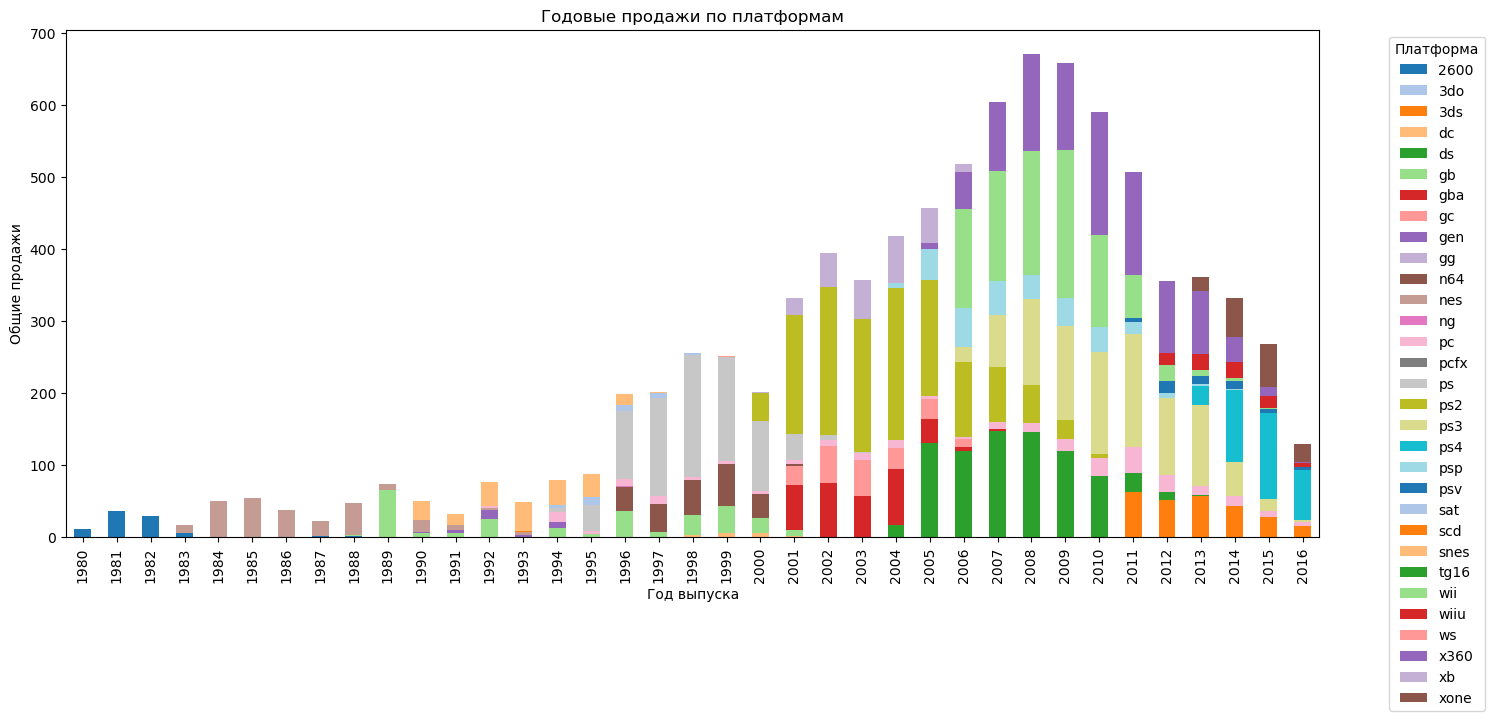

In [19]:
# Создаем сводную таблицу
pivot = df.pivot_table(index="year_of_release", columns="platform", values="total_sales", aggfunc="sum")

# Составляем список уникальных платформ
platforms = df['platform'].unique()

# Создаем палитру с разнообразием цветов, так как платформ много, и цвета могу сливаться
colors = sns.color_palette('tab20', len(platforms))

ax = pivot.plot(kind="bar", stacked=True, figsize=(15, 7), color=colors)
plt.title('Годовые продажи по платформам')
plt.ylabel('Общие продажи')
plt.xlabel('Год выпуска')
plt.legend(title='Платформа', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Похожая ситуация. Пик продал пришелся на 2008-2009, затем пошел спад. Из этого графика уже видно, что в среднем платформы "живут" около 6 лет.

Теперь посмотрим, какие платформы хорошо продавались, а какие плохо.

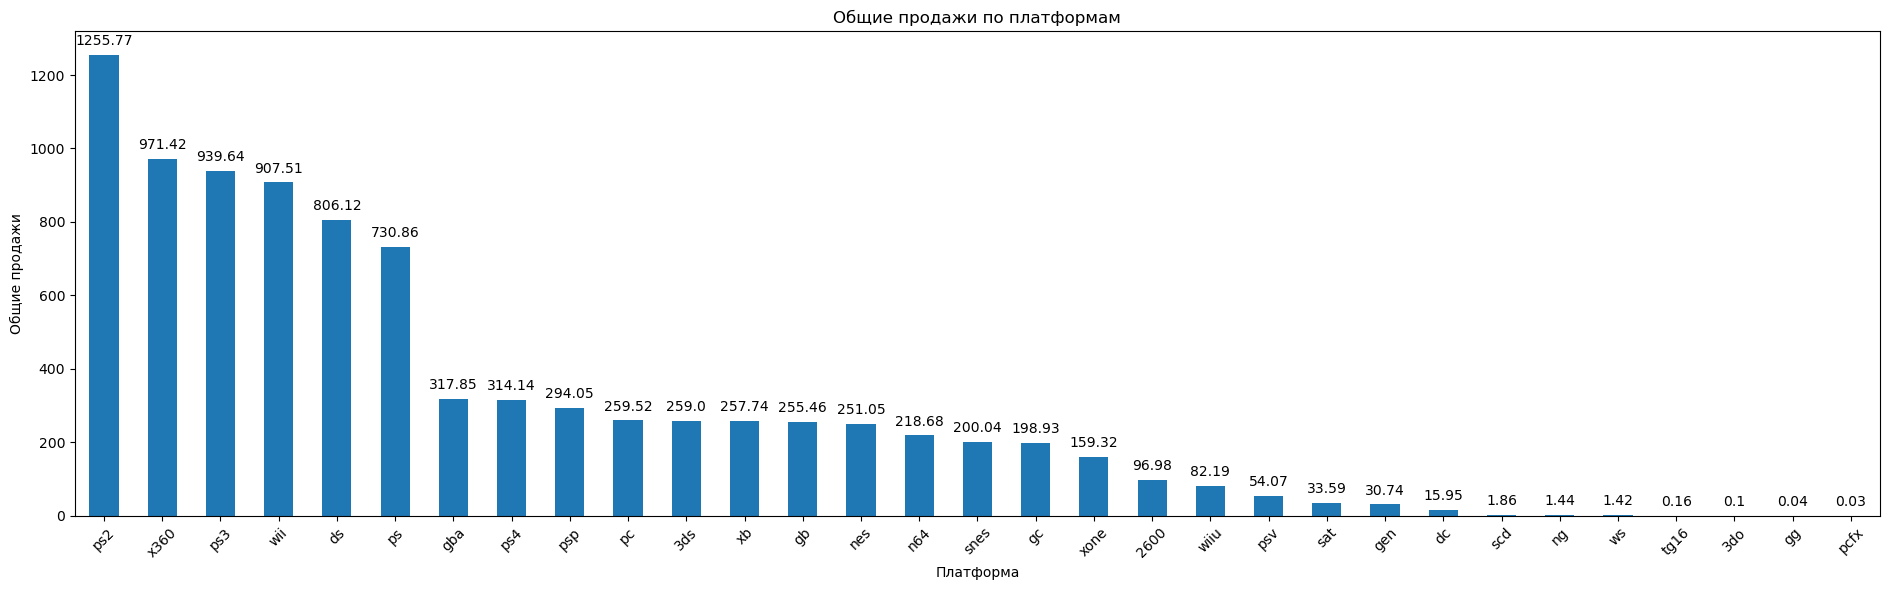

In [20]:
platform_sales = df.pivot_table(index = "platform", values = ["total_sales"], aggfunc = "sum")

platform_sales['total_sales'] = platform_sales.sum(axis=1)

# Сортируем по убыванию сразу
platform_sales = platform_sales.sort_values(by='total_sales', ascending=False)

# Срзу стоим частотный график
ax = platform_sales['total_sales'].plot(kind='bar', figsize=(19,6))
plt.title('Общие продажи по платформам')
plt.ylabel('Общие продажи')
plt.xlabel('Платформа')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


Теперь выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Чтобы это сделать, посмотрим распределения на нескольких графиках.

In [21]:
to_remove = ['pcfx', '3do', 'gg', 'tg16', 'scd', 'ng', 'ws', 'dc']
df_filtered_platform = df[~df['platform'].isin(to_remove)]

Теперь на графиках оценим "срок жизни" платформ с большей детальностью.

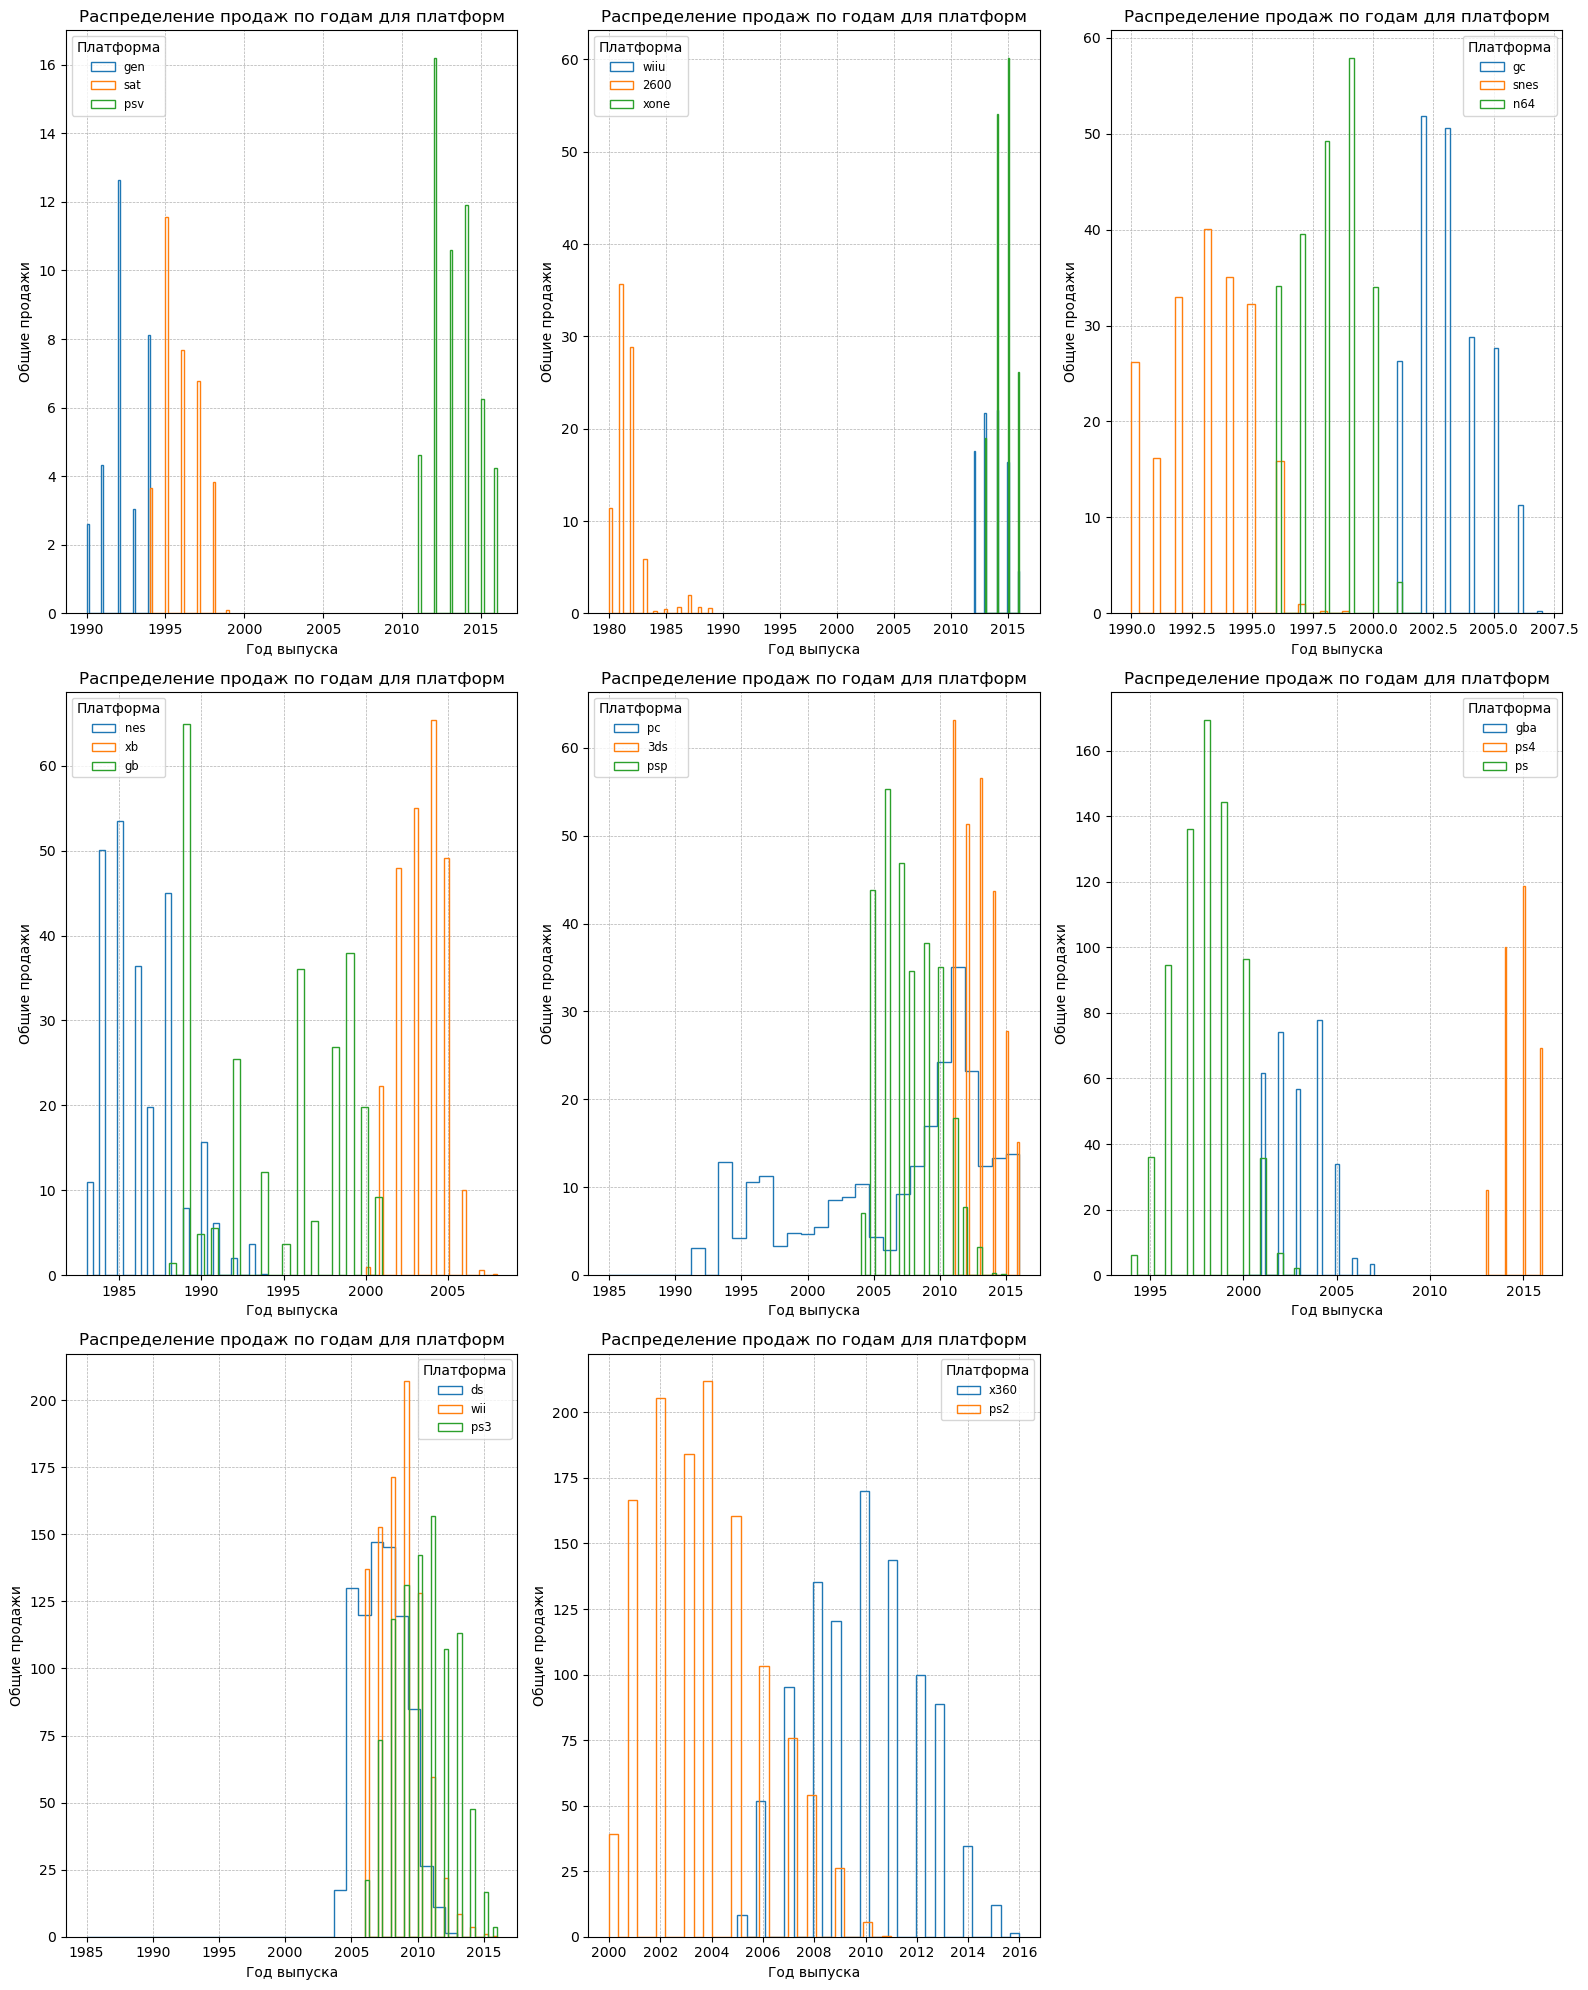

In [22]:
#Группируем платформы по продажам и сразу избавимся от тех, где нету года
df_filtered_platform.dropna(subset=['year_of_release'], inplace=True)
platform_sales_grouped = df_filtered_platform.groupby('platform')['total_sales'].sum()
#Сортируем так, чтобы самые прибыльными отобразились с самыми прибвльными и наоборот
sorted_platforms = platform_sales_grouped.sort_values().index.tolist()

# Разделяем отсортированный список платформ на группы, потому что если отобразить все вместе, то будет каша
n = 3
platforms_list = [sorted_platforms[i:i + n] for i in range(0, len(sorted_platforms), n)]

plt.figure(figsize=(16,20))

# Проходимся по спискам и строим графики
for i, platforms in enumerate(platforms_list, 1):
    plt.subplot(3, 3, i) 
    for platform in platforms:
        subset = df_filtered_platform[df_filtered_platform ['platform'] == platform]
        plt.hist(subset['year_of_release'], weights=subset['total_sales'], bins=30, label=platform, histtype='step', linewidth=1)
    
    plt.title(f'Распределение продаж по годам для платформ')
    plt.xlabel('Год выпуска')
    plt.ylabel('Общие продажи')
    plt.legend(title='Платформа', fontsize='small')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Из графиков подтверждается, что средний "срок жизни" платформы - около 6 лет. Распределяются нормально, на 3-4 год после начала использования доходят до пиковых значений, а затем идут на спад.
Однако, есть и долгожители: PS, PS2, PS3 были популярны около 10 лет, а PC - около 20.

Сейчас платформы SAT, SNES, GB, N64, XB, GC, PS, GBA, DS, PS3, WII, PS2, X360 вряд ли уже выстрелят. А вот XONE, PS4, 3DS вполне себе могут хорошо продаваться в 2017, учитывая, что за 2016 год данные неполные. Классика PC еще может продаваться, а также модели WIIU и PSV - на них может быть небольшой спрос.

Посчитаем ниже точный средний срок жизни платформы.

In [23]:
life_span = df.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
life_span['life'] = life_span['max'] - life_span['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
life_span['life'].median()

7.0

Построим визуализации по данным за актуальный период, который будет с 2014 года. Почему с 2014? Потому что нас интересует либо то, что на пике, либо то, что будет расти.

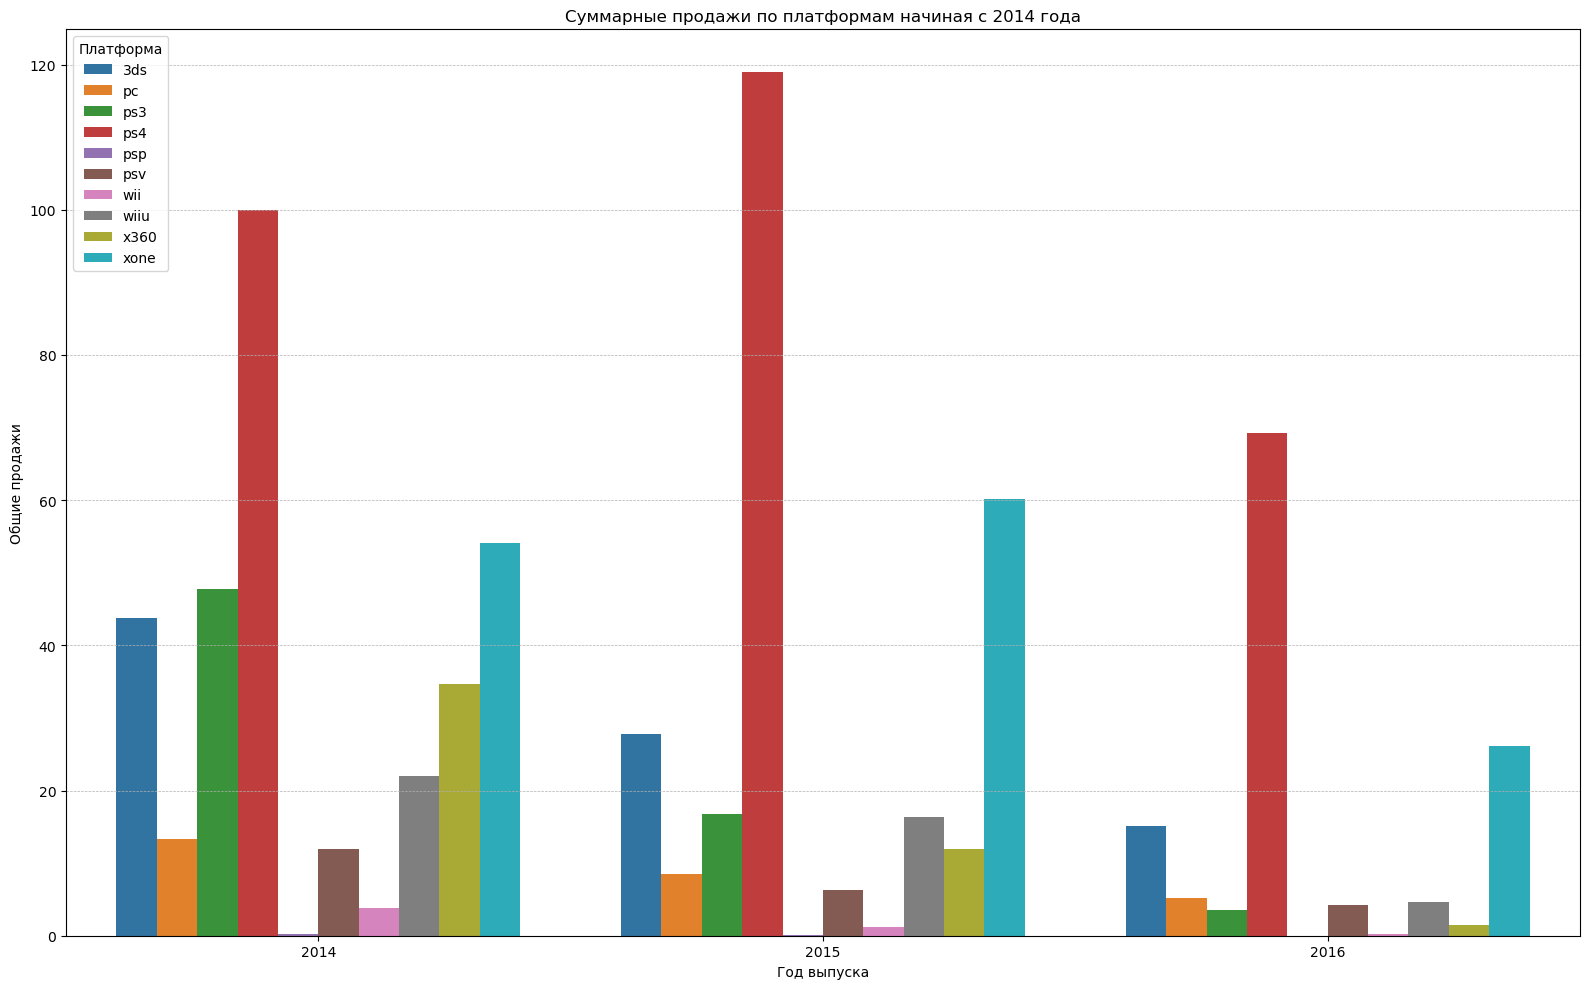

In [24]:
df_2014 = df[df["year_of_release"] >= 2014]
df_agg = df_2014.groupby(['year_of_release', 'platform']).agg({'total_sales': 'sum'}).reset_index()


plt.figure(figsize=(16,10))
sns.barplot(x='year_of_release', y='total_sales', hue='platform', data=df_agg, ci=None)
plt.title('Суммарные продажи по платформам начиная с 2014 года')
plt.xlabel('Год выпуска')
plt.ylabel('Общие продажи')
plt.legend(title='Платформа', loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
plt.tight_layout()
plt.show()


Самые перспективные на глобальном уровне - XONE, PS4.

Теперь построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

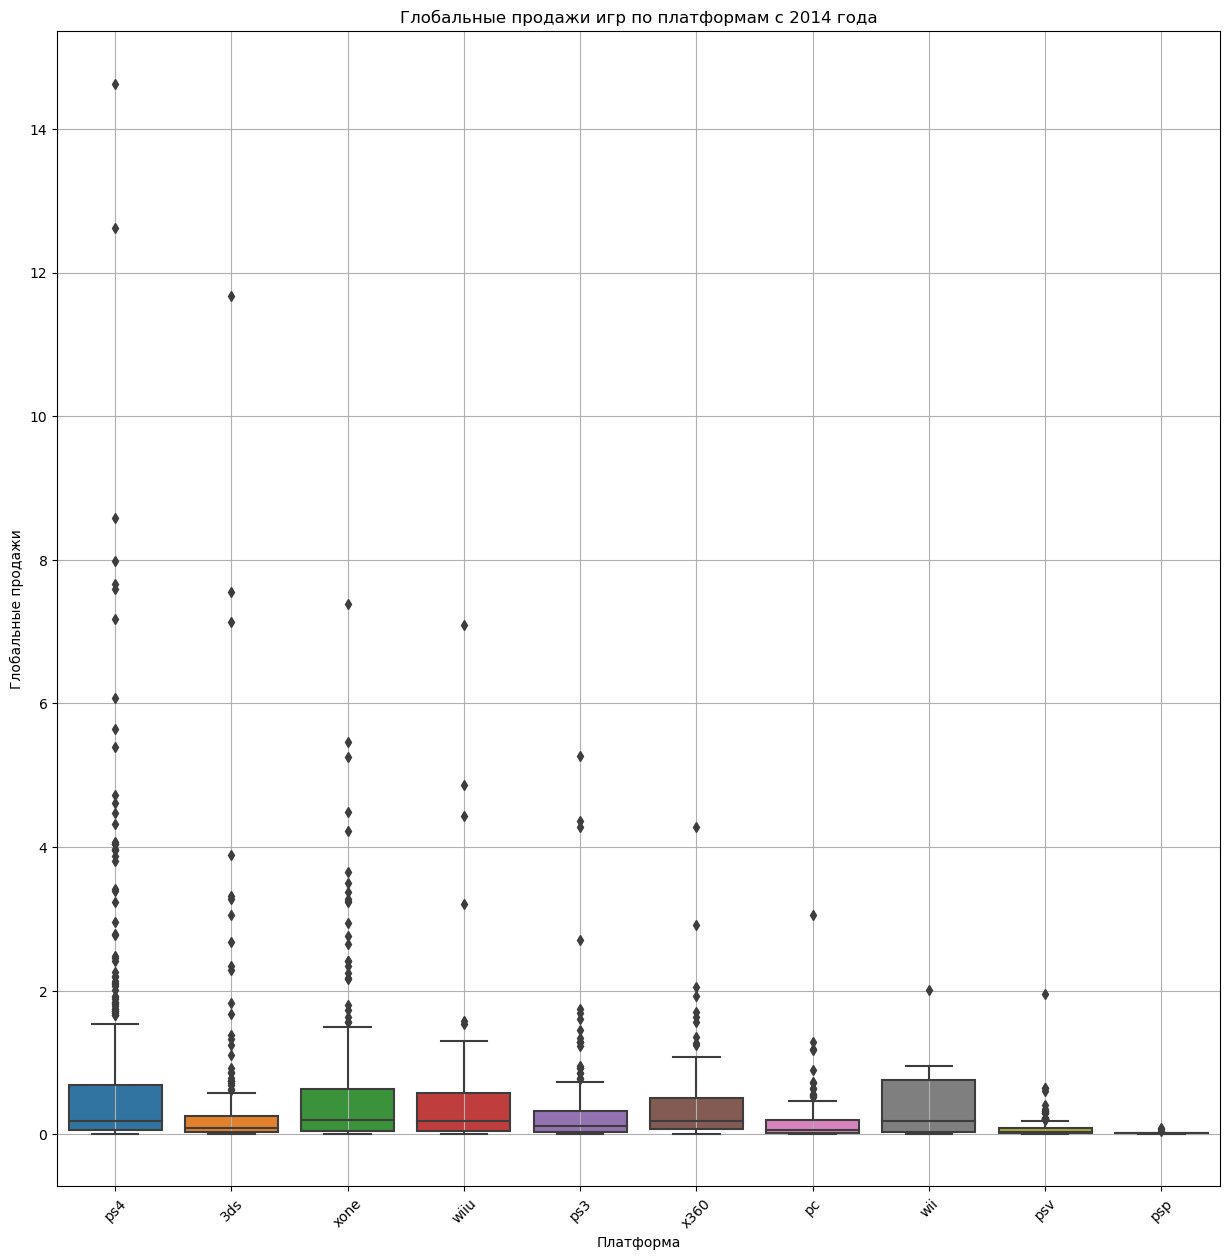

In [25]:
plt.figure(figsize=(15, 15))
sns.boxplot(data=df_2014, x='platform', y='total_sales')
plt.title("Глобальные продажи игр по платформам с 2014 года")
plt.xlabel("Платформа")
plt.ylabel("Глобальные продажи")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

На графике не видна медиана и 75-ый квантиль. Установим параметр ylim, чтобы стало понятнее.

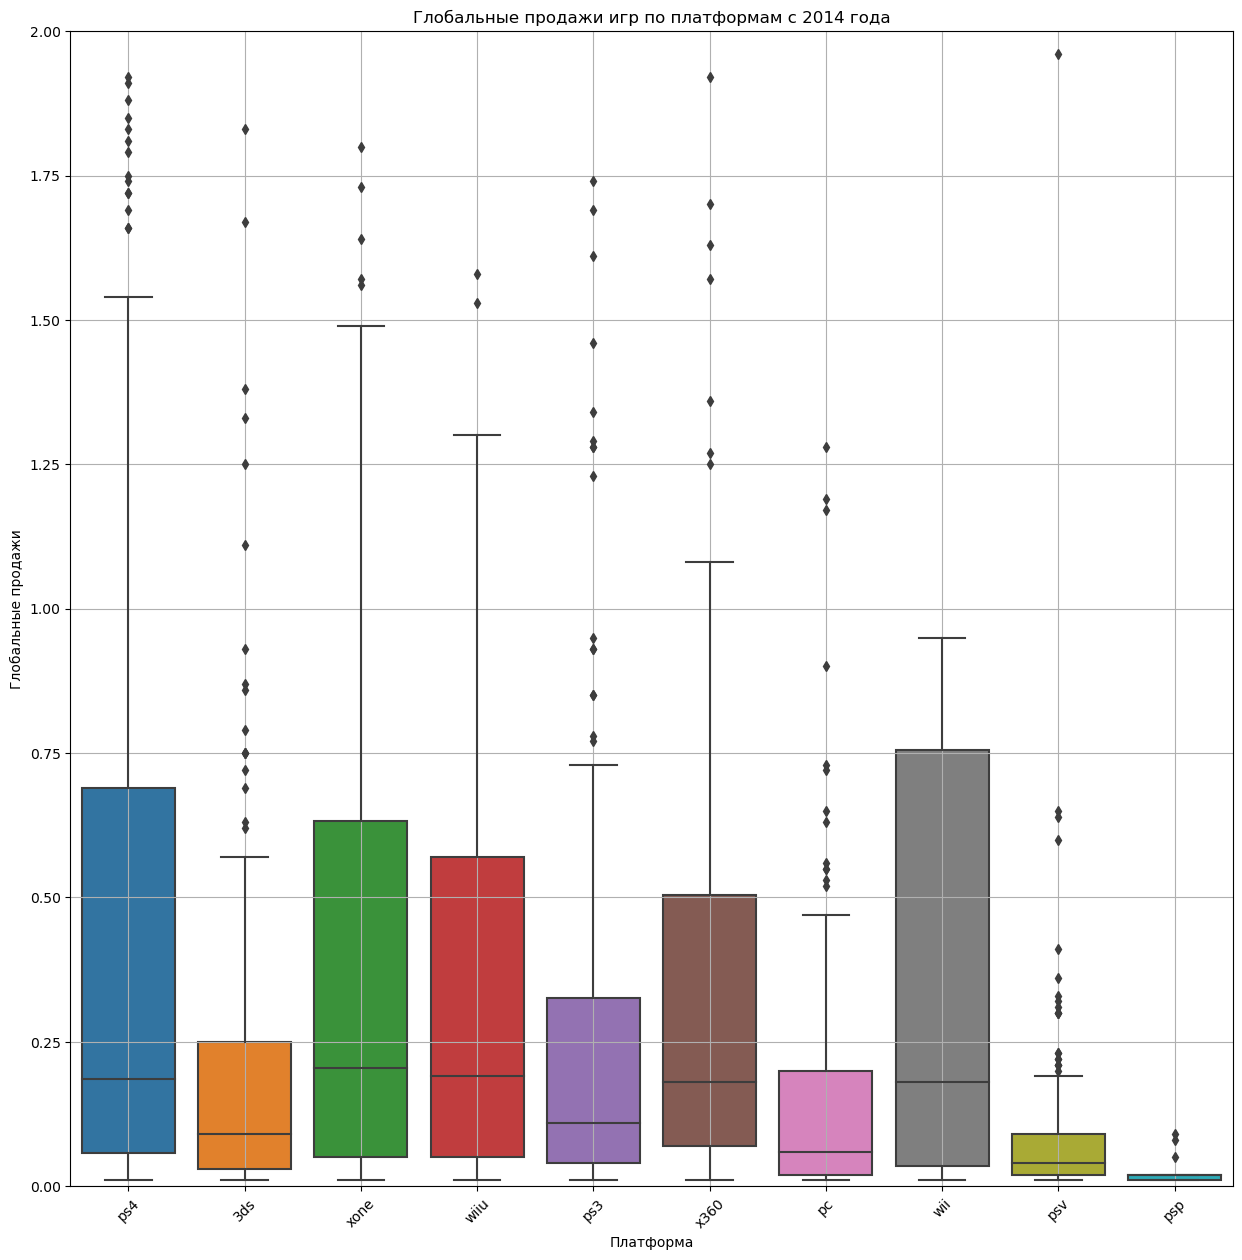

In [26]:
plt.figure(figsize=(15, 15))
sns.boxplot(data=df_2014, x='platform', y='total_sales')
plt.title("Глобальные продажи игр по платформам с 2014 года")
plt.xlabel("Платформа")
plt.ylabel("Глобальные продажи")
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(0, 2)
plt.show()

Так как у WII самый высокий верхний край ящика (выше 0.75), это означает, что 75% продаж игр для этой платформы в исследуемом периоде были выше, чем для большинства других платформ. Тем не менее, медианы у  PS4, XONE, WIIU, X360 (лидеры) находятся примерно на одном уровне. В данном случае расположение боксплота и медианы показывают, что у них стабильно высокие продажи. Соответственно, "Стримчик" должен ориентироваться на такие платформы, так как какая игра в 2017 году выстрелит, неизвестно.

Теперь посмотрим, как влияют на продажи популярных платформ отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Берем датасет актуального периода.

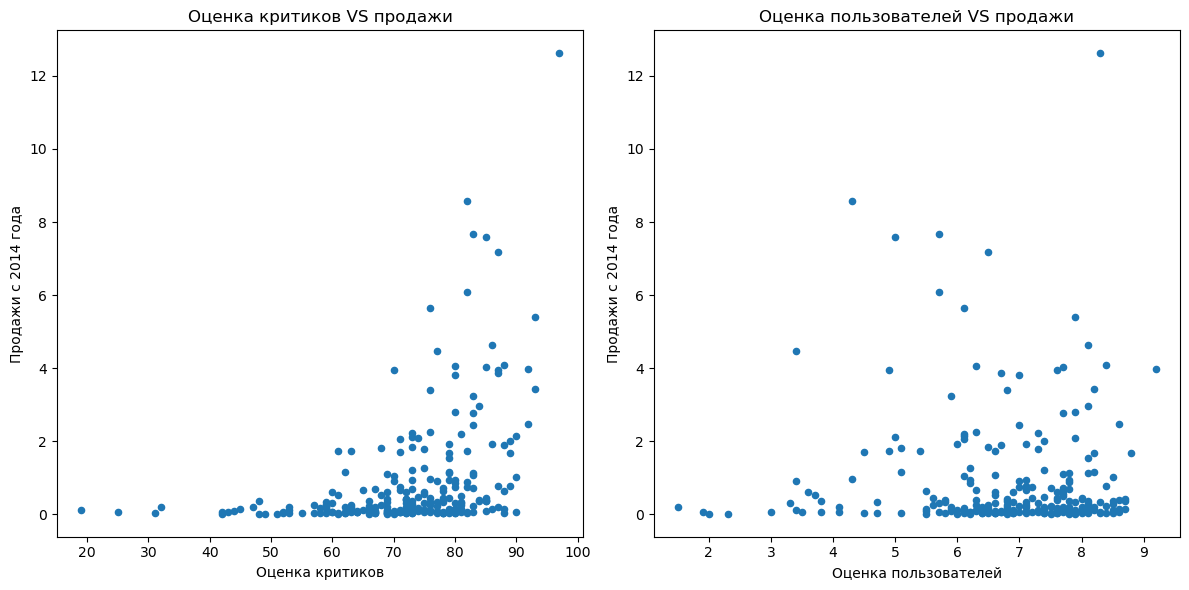

In [27]:
df_ps4 = df_2014[df_2014["platform"] == 'ps4']
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

df_ps4.plot(kind='scatter', x='critic_score', y='total_sales', ax=axes[0], title='Оценка критиков VS продажи')
axes[0].set_xlabel('Оценка критиков')
axes[0].set_ylabel('Продажи с 2014 года')

df_ps4.plot(kind='scatter', x='user_score', y='total_sales', ax=axes[1], title='Оценка пользователей VS продажи')
axes[1].set_xlabel('Оценка пользователей')
axes[1].set_ylabel('Продажи с 2014 года')

plt.tight_layout()
plt.show()

In [28]:
#проверим через корреляцию
df_ps4[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.546434,-0.040132
critic_score,0.546434,1.000000,0.402661
total_sales,-0.040132,0.402661,1.000000


Связь налицо: чем больше положительных отзывов от критиков, тем больше продаж.

Тем не менее, проверим эту тенденцию на 5 других платформах. Сделаем это через цикл.

Данные для платформы: XONE


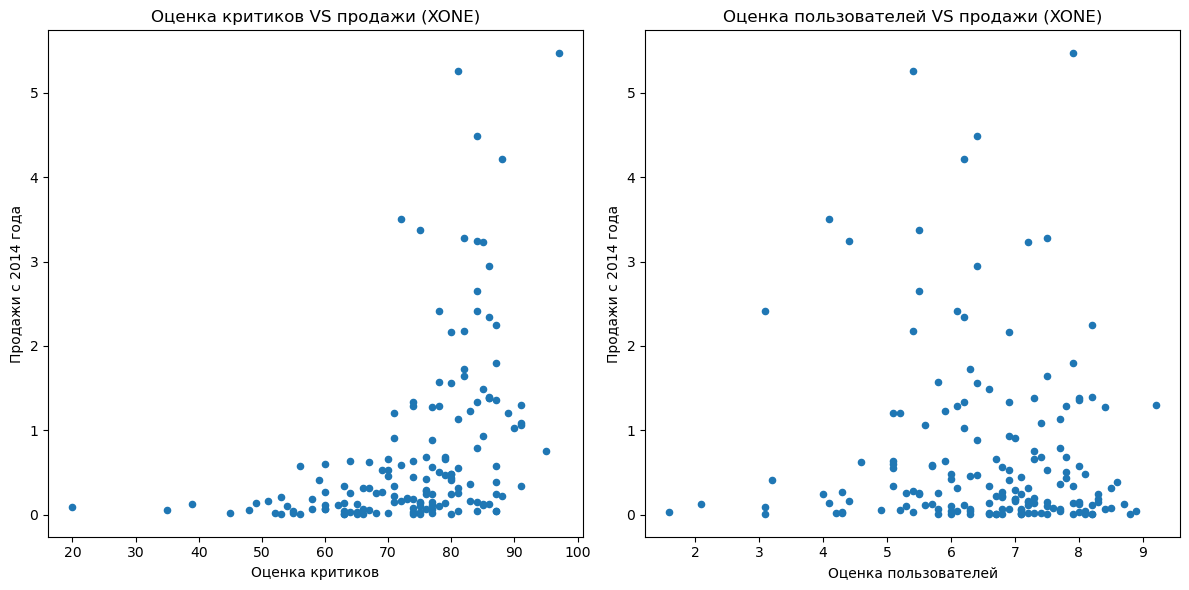

              user_score  critic_score  total_sales
user_score      1.000000      0.440977    -0.070384
critic_score    0.440977      1.000000     0.428677
total_sales    -0.070384      0.428677     1.000000


Данные для платформы: PC


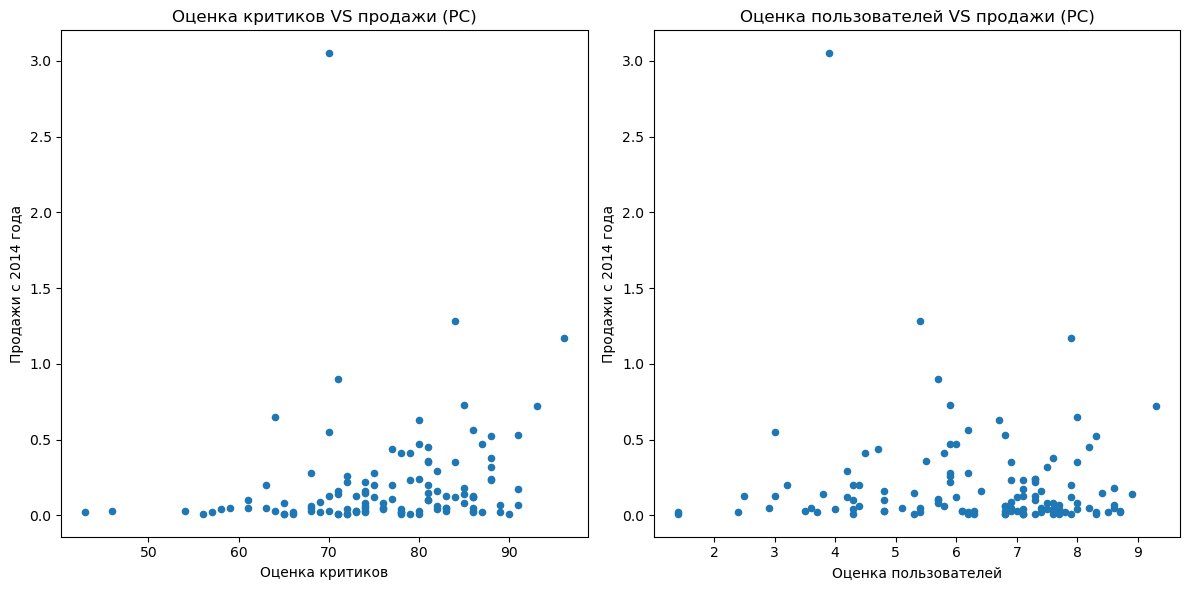

              user_score  critic_score  total_sales
user_score      1.000000      0.466099    -0.071597
critic_score    0.466099      1.000000     0.174634
total_sales    -0.071597      0.174634     1.000000


Данные для платформы: WIIU


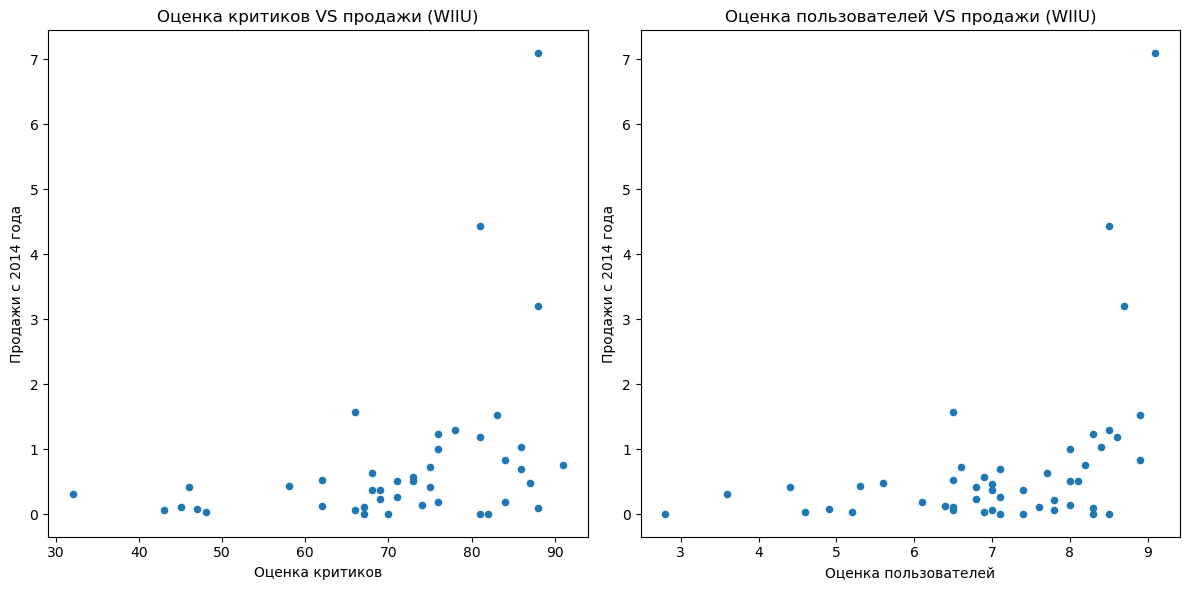

              user_score  critic_score  total_sales
user_score      1.000000      0.763536     0.407926
critic_score    0.763536      1.000000     0.370201
total_sales     0.407926      0.370201     1.000000


Данные для платформы: X360


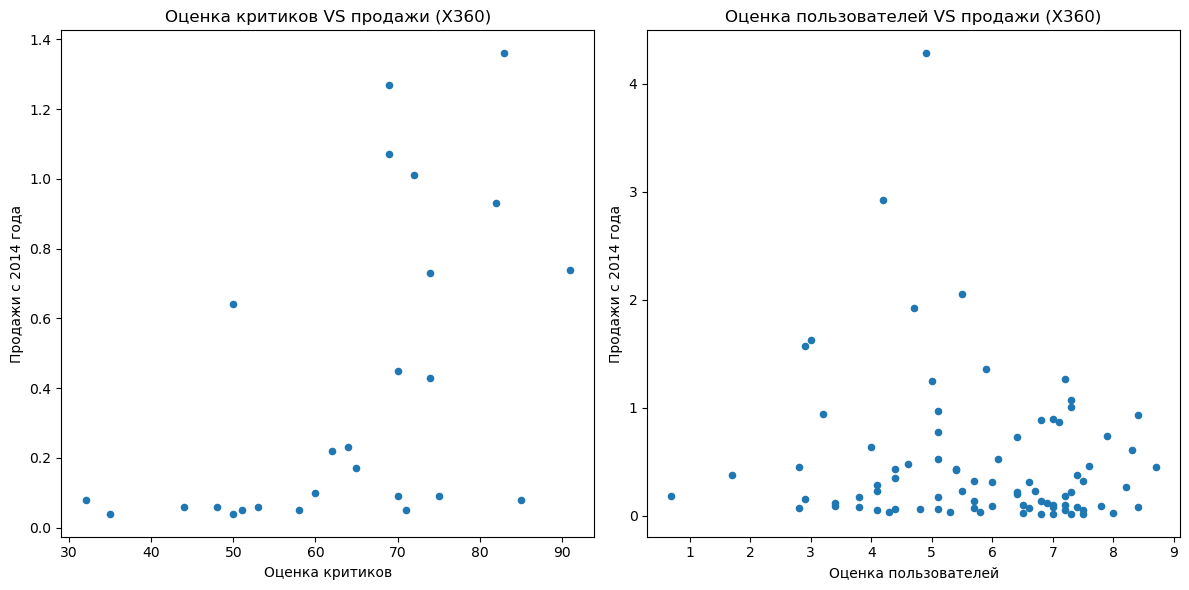

              user_score  critic_score  total_sales
user_score      1.000000      0.625309    -0.138445
critic_score    0.625309      1.000000     0.525723
total_sales    -0.138445      0.525723     1.000000


Данные для платформы: 3DS


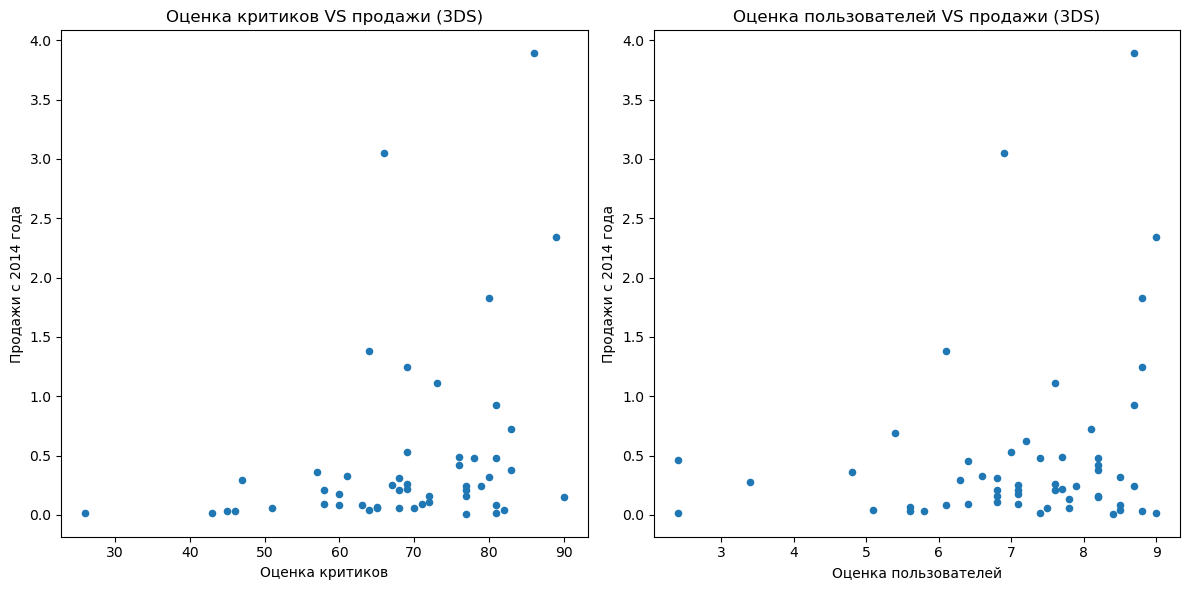

              user_score  critic_score  total_sales
user_score      1.000000      0.862485     0.215193
critic_score    0.862485      1.000000     0.314117
total_sales     0.215193      0.314117     1.000000




In [29]:
platforms = ['xone', 'pc', 'wiiu', 'x360', '3ds']

for platform in platforms:
    print(f"Данные для платформы: {platform.upper()}")
    
    # Фильтруем данные для текущей платформы
    df_platform = df_2014[df_2014["platform"] == platform]
    
    # Построение графиков
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    df_platform.plot(kind='scatter', x='critic_score', y='total_sales', ax=axes[0], title=f'Оценка критиков VS продажи ({platform.upper()})')
    axes[0].set_xlabel('Оценка критиков')
    axes[0].set_ylabel('Продажи с 2014 года')
    
    df_platform.plot(kind='scatter', x='user_score', y='total_sales', ax=axes[1], title=f'Оценка пользователей VS продажи ({platform.upper()})')
    axes[1].set_xlabel('Оценка пользователей')
    axes[1].set_ylabel('Продажи с 2014 года')
    
    plt.tight_layout()
    plt.show()
    
    # Вывод корреляционной матрицы
    print(df_platform[['user_score', 'critic_score', 'total_sales']].corr())
    print("\n" + "="*50 + "\n")

Тенденция сошлась: чем выше отзыв от критиков, тем больше продажи. Иногда также наблюдается связь между отзывами пользователей и продажами.

Теперь посмотрим на общее распределение игр по жанрам.

In [30]:
df_2014["genre"].value_counts()

genre
action          619
role-playing    221
adventure       185
sports          161
shooter         128
misc            113
racing           69
fighting         60
simulation       44
platform         38
strategy         37
puzzle           14
Name: count, dtype: int64

Посмотрим на самые продаваемые игры за актуальный период. Сделаем сравнение медианных продаж, проиллюстрировав их диаграммами размаха.

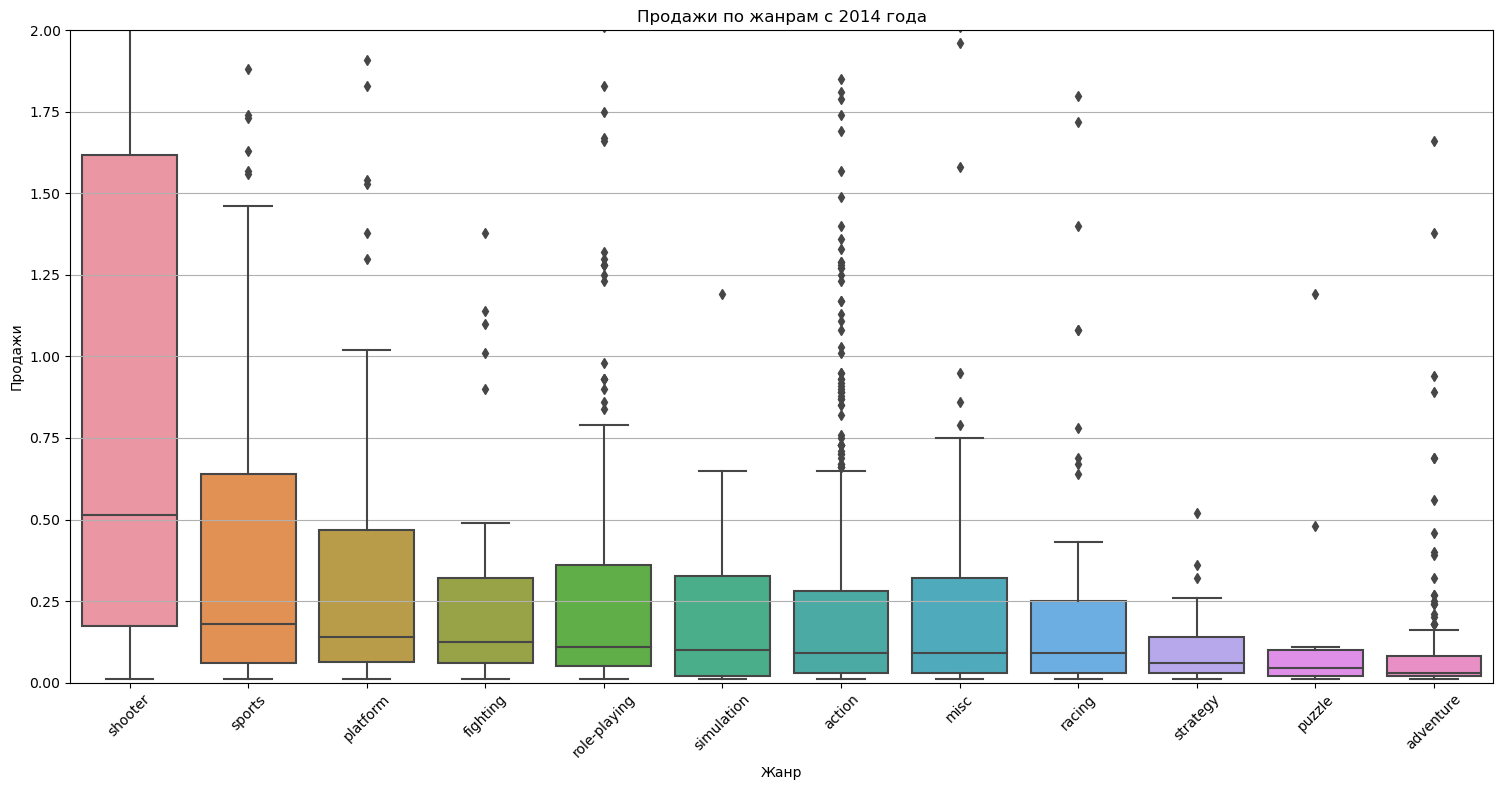

In [31]:
order = df_2014.groupby('genre')['total_sales'].median().sort_values(ascending=False).index

plt.figure(figsize=(15, 8))
sns.boxplot(data=df_2014, x='genre', y='total_sales', order=order)
plt.title("Продажи по жанрам с 2014 года")
plt.xlabel("Жанр")
plt.ylabel("Продажи")
plt.xticks(rotation=45)
plt.grid(True, axis="y")
plt.tight_layout()
plt.ylim(0, 2)
plt.show()

Игры в жанре шутер  - самые популярные, они продаются лучше всего. Затем спортивные, затем платформеры, после бои, и замыкают пятерку ролевые. Самые непродаваемые игры - это стратегии, пазлы и приключения. Важно отметить, что мы здесь ищем стабильность в продажах, ведь можно сделать уникальный сюжет, быстрый движок, красивую графику и вложить много денег в рекламу, и тогда продажи игры подпрыгнут. Но нам лучше выбирать игру из жанра, на которой есть постоянный спрос независимо от маркетинговых усилий производителей игр.

### Промежуточный вывод после проведения исследовательского анализа данных

- Средний цикл жизни платформы - 7 лет. В настоящий момент ни одна платформа не наблюдается на пике продаж. Наоборот, идет спад. Тем не менее, среди платформ, можно выделить XONE и PS4 для рекламирования.

- Самые продаваемые жанры - игры в жанре шутер. Затем спортивные, затем платформеры, после бои, и замыкают пятерку ролевые. Самые непродаваемые игры - это стратегии, пазлы и приключения.

- Наблюдается связь между положительными отзывами критиков и количеством продаж.

- У платформы WII, 75% продаж игр для этой платформы в исследуемом периоде были выше, чем для большинства других платформ. Тем не менее, медианы у PS4, XONE, WIIU, X360 (лидеры в период 2014-2016) находятся примерно на довольно высоком уровне, что указывает на стабильность их продаж.

- В целом наблюдается спад продаж игр. Вообще это логично, так как после 2007 начали появляться у многих смартфоны и высокоскоростной домашний интернет уже был нормой.

## Составление портрета пользователя

Составим портрет пользователя каждого региона (NA, EU, JP). Определим для них:

- Самые популярные платформы (топ-5)

- Самые популярные жанры (топ-5)

- Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе?

Начнём с самых популярных платформ. Сделаем графики все вместе, так как опытным путем проверно, что если поставить их вместе, то видно, в каком регионе продажи идут лучше.

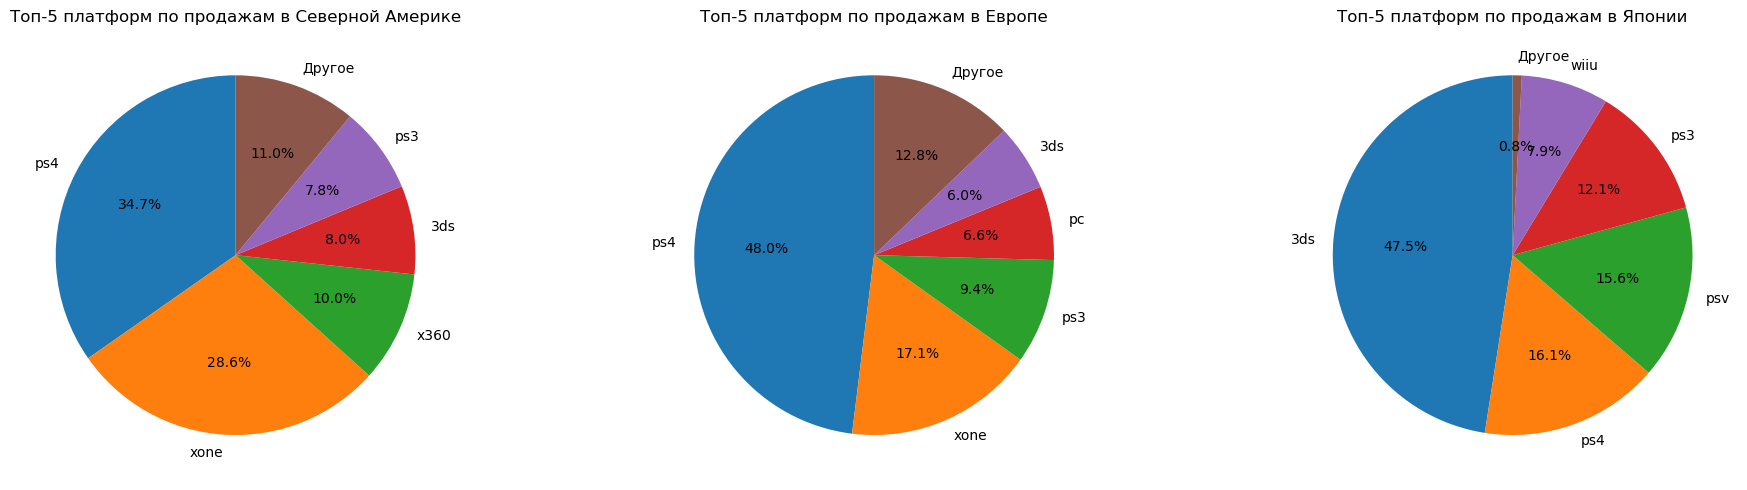

In [32]:
# Группируем
na_platform = df_2014.groupby('platform')['na_sales'].sum()
eu_platform = df_2014.groupby('platform')['eu_sales'].sum()
jp_platform = df_2014.groupby('platform')['jp_sales'].sum()

# Nоп-5 платформ
top_5_na_platforms = na_platform.sort_values(ascending=False).head(5)
top_5_eu_platforms = eu_platform.sort_values(ascending=False).head(5)
top_5_jp_platforms = jp_platform.sort_values(ascending=False).head(5)

# Оформляем "Другое"
other_platforms_na = na_platform.sort_values(ascending=False).iloc[5:].sum()
other_platforms_eu = eu_platform.sort_values(ascending=False).iloc[5:].sum()
other_platforms_jp = jp_platform.sort_values(ascending=False).iloc[5:].sum()

# Добавляем "Другое"
top_5_na_platforms['Другое'] = other_platforms_na
top_5_eu_platforms['Другое'] = other_platforms_eu
top_5_jp_platforms['Другое'] = other_platforms_jp

# Создаем диаграммы
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

top_5_na_platforms.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[0], title='Топ-5 платформ по продажам в Северной Америке')
top_5_eu_platforms.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[1], title='Топ-5 платформ по продажам в Европе')
top_5_jp_platforms.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[2], title='Топ-5 платформ по продажам в Японии')

for ax in axes:
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

### Вывод по продажам платформ по регионам

- В Северной Америке в лидерах PS4, XONE,  X360, 3DS, PS3,

- В Европе: PS4, XONE, PS3, PC, 3DS

- В Японии: 3DS, PS4, PSV, PS3, WIIU

Теперь посмотрим на самые популярные жанры. Построим графики вместе таким же образом.

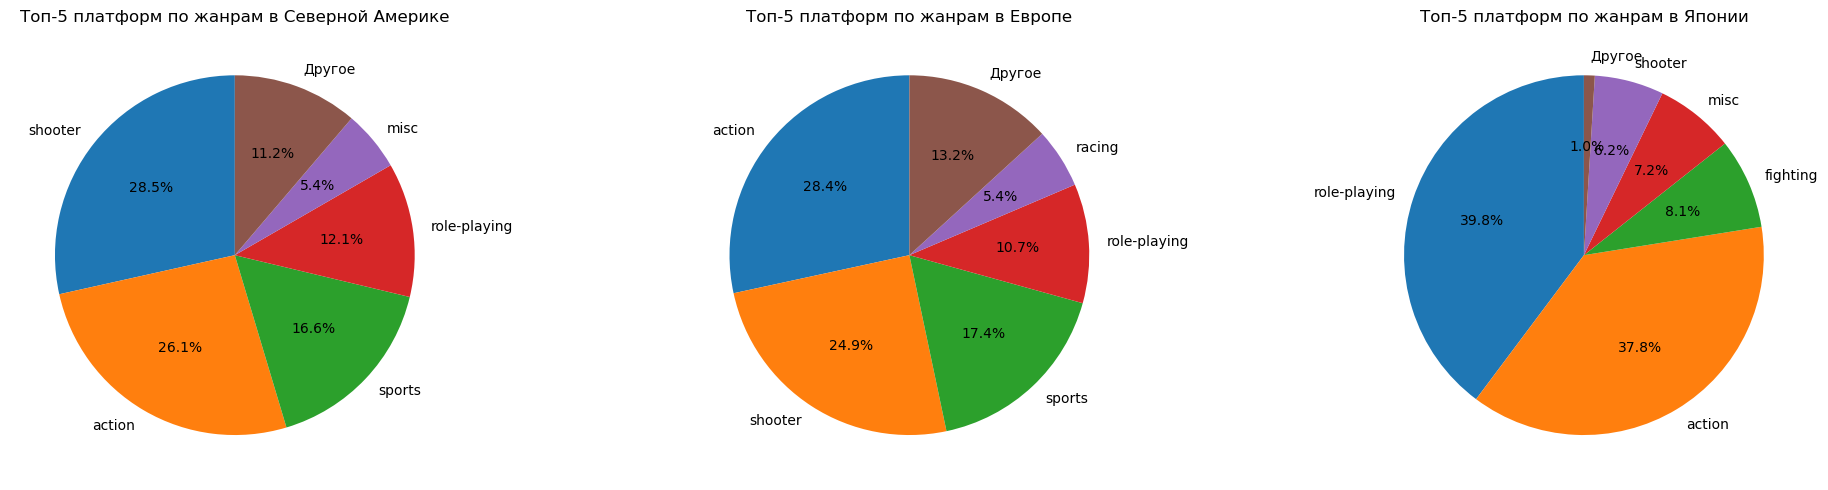

In [33]:
# Группируем
na_genre = df_2014.groupby('genre')['na_sales'].sum()
eu_genre = df_2014.groupby('genre')['eu_sales'].sum()
jp_genre = df_2014.groupby('genre')['jp_sales'].sum()

# Nоп-5 платформ
top_5_na_genres = na_genre.sort_values(ascending=False).head(5)
top_5_eu_genres = eu_genre.sort_values(ascending=False).head(5)
top_5_jp_genres = jp_genre.sort_values(ascending=False).head(5)

# Оформляем "Другое"
other_genres_na = na_platform.sort_values(ascending=False).iloc[5:].sum()
other_genres_eu = eu_platform.sort_values(ascending=False).iloc[5:].sum()
other_genres_jp = jp_platform.sort_values(ascending=False).iloc[5:].sum()

# Добавляем "Другое"
top_5_na_genres['Другое'] = other_genres_na
top_5_eu_genres['Другое'] = other_genres_eu
top_5_jp_genres['Другое'] = other_genres_jp

# Создаем диаграммы
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

top_5_na_genres.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[0], title='Топ-5 платформ по жанрам в Северной Америке')
top_5_eu_genres.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[1], title='Топ-5 платформ по жанрам в Европе')
top_5_jp_genres.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[2], title='Топ-5 платформ по жанрам в Японии')

for ax in axes:
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

</font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Сделала </b></font>

### Вывод по продажам по жанрам по регионам

- В Северной Америке в лидерах шутеры, экшн, спортивные, ролевые и "разное"

- В Европе: тоже экшн, шутеры, спортивные, ролевые, гонки

- В Японии: ролевые, экшн, "разное", бои, шутеры

- Больше всего продаж снова в Северной Америке. Самый популярный жанр в 3 регионах - экшн. Наименее популярные в 3 регионах - стратегии, пазлы и приключенческие.

Теперь посмотрим, влияет ли рейтинг ESRB на продажи в отдельных регионах. Здесь возбмем с 1994 - с тех пор, как этот рейтинг вообще ввели. Построим графики вместе таким же образом.

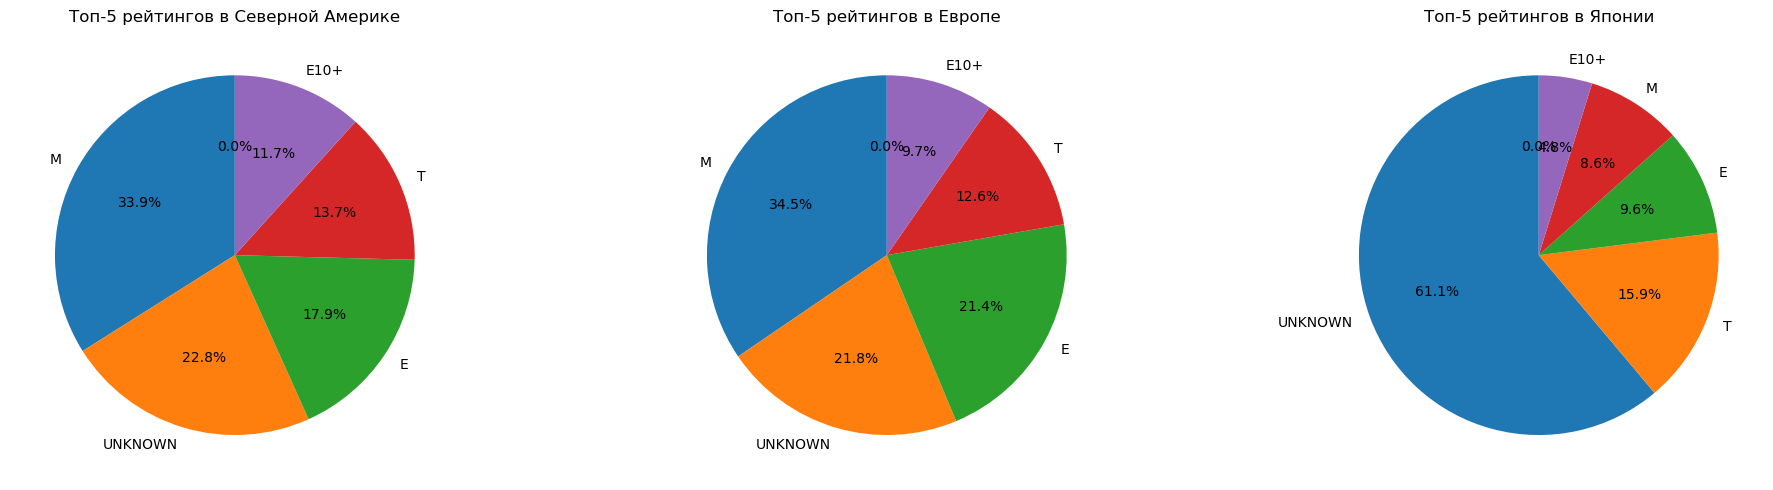

In [34]:
# Группируем
na_rating = df_2014.groupby('rating')['na_sales'].sum()
eu_rating = df_2014.groupby('rating')['eu_sales'].sum()
jp_rating = df_2014.groupby('rating')['jp_sales'].sum()

# Топ-5 рейтингов
top_5_na_ratings = na_rating.sort_values(ascending=False).head(5)
top_5_eu_ratings = eu_rating.sort_values(ascending=False).head(5)
top_5_jp_ratings = jp_rating.sort_values(ascending=False).head(5)

# Оформляем "Другое"
other_ratings_na = na_rating.sort_values(ascending=False).iloc[5:].sum()
other_ratings_eu = eu_rating.sort_values(ascending=False).iloc[5:].sum()
other_ratings_jp = jp_rating.sort_values(ascending=False).iloc[5:].sum()

# Добавляем "Другое"
top_5_na_ratings['Другое'] = other_ratings_na
top_5_eu_ratings['Другое'] = other_ratings_eu
top_5_jp_ratings['Другое'] = other_ratings_jp

# Создаем диаграммы
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

top_5_na_ratings.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[0], title='Топ-5 рейтингов в Северной Америке')
top_5_eu_ratings.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[1], title='Топ-5 рейтингов в Европе')
top_5_jp_ratings.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[2], title='Топ-5 рейтингов в Японии')

for ax in axes:
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

### Вывод по продажам по жанрам по рейтингам

- В Северной Америке в лидерах M (Mature) для взрослых от 17 лет и старше, UNKNOWN, E (Everyone) - для людей от 6 лет и старше, T (Teen) от 13 лет и старше для подростков, E10+ (Everyone 10 and older) - для всех старше 10 лет.

- В Европе ситуация абсолютно такая же.

- В Японии: UNKNOWN, T (Teen) от 13 лет и старше для подростков, E (Everyone) - для людей от 6 лет и старше, M (Mature) для взрослых от 17 лет и старше,  E10+ (Everyone 10 and older) - для всех старше 10 лет.

Плохо продается только для взрослых AO (Adults Only) и EC (Early Childhood). RP (Rating Pending) мало влияет, их таких всего 3 штуки, а K-A (Kids to Adults) был заменен в 1997 на E. Все это не вошло в диаграммы.

Также значительную часть данных занимает UNKNOWN - игры с непроставленным рейтингом.

### Вывод по портрету пользователя по регионам

- Северная Америка. Больше всего любит игры жанра шутеры, экшн, спортивные, ролевые и "разное". Предпочитает платформы PS4, XONE, X360, 3DS, PS3. 

- Европа. Покупает игр гораздо меньше, чем в Северной Америке, но больше, чем в Японии. Больше всего любит игры экшн, шутеры, спортивные, ролевые, гонки. Предпочитает платформы PS4, XONE, PS3, PC, 3DS.

- Япония. Покупает игр гораздо меньше, чем в дргуих регионах. Больше всего любит игры жанра ролевые, экшн, "разное", бои, шутеры. Предпочитает платформы 3DS, PS4, PSV, PS3, WIIU.

- Значительную часть данных занимает UNKNOWN - игры с непроставленным рейтингом.
В Северной Америке и в Европе ситуация такова: больше всего покупаются игры с маркировкой M (Mature) для взрослых от 17 лет и старше. В Японии первыми идут игры с неизвестной маркировкой, и таких около половины от всех, что логично, так как для этого рынка маркировка не делается, а затем игры для подростков T (Teen) от 13 лет и старше для подростков.

- Плохо продается только для взрослых AO (Adults Only) и EC (Early Childhood). RP (Rating Pending) мало влияет, их таких всего 3 штуки, а K-A (Kids to Adults) был заменен в 1997 на E. Все это не вошло в диаграммы.

Посмотрим, в каком регионе больше всего продаж, хоть в задании и не сказано. Хочется это сделать, чтобы ответить на вопрос, где рекламировать.

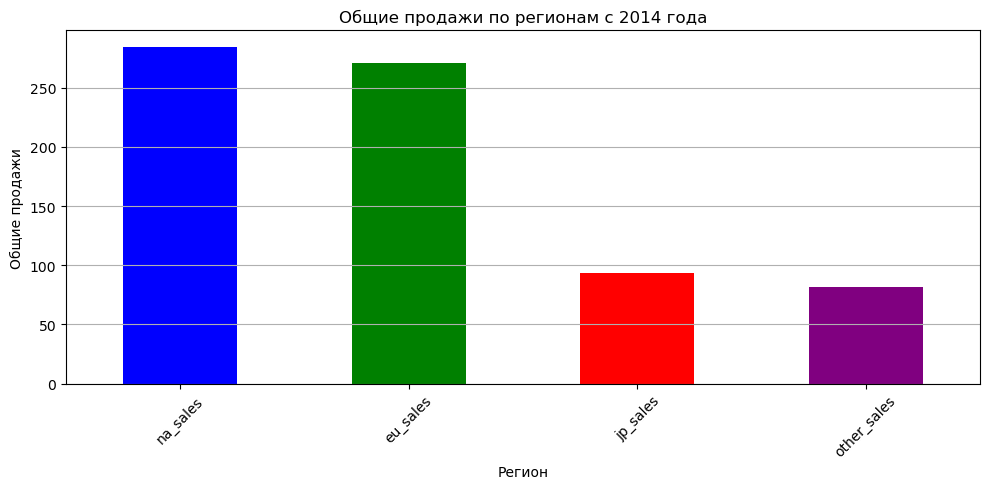

In [35]:
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
sales_by_region = df_2014[regions].sum()

sales_by_region.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), color=['blue', 'green', 'red', 'purple'])
plt.title('Общие продажи по регионам с 2014 года')
plt.xlabel('Регион')
plt.ylabel('Общие продажи')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, axis="y")

plt.show()

Получается, что в Северной Америке и Европе продали гораздо больше, чем в Японии и других регионах.

## Проверка гипотез

Проверим несколько гипотез.

1.

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC НЕ одинаковые.

Судя по всему, XONE - это XBOX ONE.

Так как у нас было 7590 пропусков в user_score, то сначала придется избавиться от них, а то тест не получится.

In [36]:
reviews_user_xone = df_2014[df_2014["platform"] == "xone"]
reviews_user_pc = df_2014[df_2014["platform"] == "pc"]

reviews_user_xone = reviews_user_xone.dropna(subset=['user_score'])
reviews_user_pc = reviews_user_pc.dropna(subset=['user_score'])

alpha = 0.05 # уровень статистической значимости # если p-value окажется меньше него, отвергнем гипотезу
results = st.ttest_ind(reviews_user_xone["user_score"], reviews_user_pc["user_score"])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Посмотрим, что будет, если alpha поставить поменьше

In [37]:
alpha = 0.01 # уровень статистической значимости # если p-value окажется меньше него, отвергнем гипотезу
results = st.ttest_ind(reviews_user_xone["user_score"], reviews_user_pc["user_score"])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


In [38]:
#проверка того, что результаты не противоречат гипотезам.
print(reviews_user_xone['user_score'].mean())
print(reviews_user_pc['user_score'].mean())

6.594545454545456
6.298360655737705


Вторая гипотеза:

Нулевая гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
Альтернативная гипотеха: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [39]:
reviews_user_action = df_2014[df_2014["genre"] == "action"]
reviews_user_sports = df_2014[df_2014["genre"] == "sports"]

reviews_user_action = reviews_user_action.dropna(subset=['user_score'])
reviews_user_sports = reviews_user_sports.dropna(subset=['user_score'])

alpha = 0.05 # уровень статистической значимости # если p-value окажется меньше него, отвергнем гипотезу
results = st.ttest_ind(reviews_user_action["user_score"], reviews_user_sports["user_score"])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Посмотрим, что будет, если alpha поставить поменьше

In [40]:
alpha = 0.01 # уровень статистической значимости # если p-value окажется меньше него, отвергнем гипотезу
results = st.ttest_ind(reviews_user_action["user_score"], reviews_user_sports["user_score"])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


In [41]:
#проверка того, что результаты не противоречат гипотезам.
print(reviews_user_action['user_score'].mean())
print(reviews_user_sports['user_score'].mean())

6.760606060606061
5.2251968503937


### Вывод после проверки гипотез

Был проведен статистический тест для проверки гипотез. Использовался двусторонний статистический t-test для независимых выборок.

1. На имеющихся данных, на уровне значимости 5% и 1% нет оснований отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов платформ Xbox One и PC в пользу альтернативной гипотезы. Согласно базовой пост-проверке по средним, пользовательске рейтинги PC больше рейтингов Xbox One всего на 0.3 балла. Похоже на то, что статистические различие между этими выборами не настолько значимы, чтобы считать, что их средние относятся к разным совокупностям.

2. На имеющихся данных, на уровне значимости 5% и 1% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы. Согласно пост-проверке по средним, пользовательске рейтинги экшн-игр больше рейтингов спорт-игр приблизительно на 1.5 балла.

# Общий вывод

Был проведен анализ данных интернет-магазина «Стримчик»с целью определения факторов, влияющих на успешность компьютерных игр.

Датасет был правдоподобен, за период от 1980 до 2016. Были пропуски в столбцах с рейтингом и пользовательскими отзывами, отзывами критиков и годами. В конце концов пропуски в отзывах были удалены (заполнять по жанру было бы слишком сильным обобщением, и в  анализе в итоге учитывались те данные, которые в датасете были. Пропуски в рейтинге были заполнены заглушкой. Было несколько дубликатов и они были удалены. Аномалий тоже не было.

На основе анализа данных можно выделить следующие ключевые факторы, влияющие на успешность компьютерных игр:

- Пик выпуска игр приходится на период 2007-2011 годов. В целом сейчас наблюдается тенденция на спад как выпуска, так и покупок игр. Эта тенденция началась в 2008. Возможно, она связана с массовым распространением смартфонов или соцмедиа, таких, как инстаграм, и люди стаи проводить больше времени в таких соцсетях.

- Средний "срок жизни" игровой платформы составляет 7 лет. Однако, некоторые платформы, такие как PS, PS2 и PS3, держатся на рынке около 10 лет, а PC — даже около 20 лет. Поэтому при закупке рекламы рекомендуется не заказывать то, что уже висит на рынке больше 4-5 лет, только если это не какая-то особая платформа с очень хорошими отзывами. 

- В 2017 году потенциально высокий спрос можно ожидать на игры для платформ XONE, PS4, а также 3DS. Эти результаты были получены в результате анализа от 2014 года, так как технологии быстро меняются, а нам нужно учесть зарождающиеся и пиковые тенденции, а не убывающие.

- Положительные отзывы, особенно от критиков, коррелируют с высокими продажами.

- Игры жанра шутер, экшн, спортивные, ролевые и "разное" являются самыми продаваемыми жанрами в Северной Америке. В Европе: экшн, шутеры, спортивные, ролевые, гонки. В Японии наиболее популярны ролевые, экшн, "разное", бои, шутеры. Пазлы, стратегии и приключения наименее популярны во всех регионах. Можно рекомендовать закупать экшн, шутеры и спортивные игры в первую очередь.

 - В Северной Америке в лидерах PS4, XONE, X360, 3DS, PS3, в Европе - PS4, XONE, PS3, PC, 3DS, в Японии - 3DS, PS4, PSV, PS3, WIIU. Эти результаты были получены в результате анализа данных от 2014 года, так как нам здесь интересен портрет пользователя (во что и на чем играет), а не срок жизни платформы.

- Во всех регионах наиболее популярны игры, рассчитанные на широкую аудиторию (Everyone, Teen и Mature). Игры, разработанные исключительно для взрослых или для детей до 3 лет, менее востребованы. Однако, около 40% датасета - игры с неизвестной маркировкой, это нужно иметь в виду.двух 

- В Европу и Северную Америку продается гораздо больше, чем в Японию и другие регионы. Стоит рекламировать больше в Европе и Северной Америке.

Также были проверены две гипотезы:

- На имеющихся данных, на уровне значимости 5% и 1% нет оснований отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов платформ Xbox One и PC в пользу альтернативной гипотезы. Согласно базовой пост-проверке по средним, пользовательске рейтинги PC больше рейтингов Xbox One всего на 0.3 балла. Похоже на то, что статистические различие между этими выборами не настолько значимы, чтобы считать, что их средние относятся к разным совокупностям.

- На имеющихся данных, на уровне значимости 5% и 1% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы. Согласно пост-проверке по средним, пользовательске рейтинги экшн-игр больше рейтингов спорт-игр приблизительно на 1.5 балла.

В заключение можно сказать следующее: рекламному отделу можно передать, что стоит уделить внимание платфорам XONE и PS4, акцентировать внимание на жанрах шутер, экшн, спортивные и ролевые, а также стараться выбирать те игры, у которых хорошие отзывы от критиков. Также лучше брать рекламу игр для аудитории от 17 лет M Mature или E Everyone от 6 лет, но еси маркировки нет, а все остальные критерии совпадают, то тогда все равно рекламу на такую игру можно закупить. Можно также порекомендовать не рассматривать массивную закупку рекламы игр только для взрослых или для самых маленьких и жанров приключения, пазл и стратегии.